Block 1 — Preparation
Short setup step: imports, seeds, folder creation, CSV logger, and summary. Nothing complex, just clean and reproducible.

In [1]:
# ============================================================
# ⚙️ Installation des dépendances du projet
# Cette cellule garantit que toutes les librairies nécessaires sont installées.
# ============================================================

import subprocess
import sys

def install_requirements(file_path="requirements.txt"):
    """Installe les paquets listés dans requirements.txt."""
    print(f"Installation/Mise à jour des dépendances via {file_path}...")
    try:
        # Exécute la commande pip
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", file_path])
        print("\n✅ Toutes les dépendances ont été installées ou mises à jour avec succès.")
        print("Veuillez REDÉMARRER le noyau (kernel) du notebook si c'est la première exécution.")
    except subprocess.CalledProcessError as e:
        print(f"\n❌ ERREUR lors de l'installation des dépendances : {e}")

# Exécuter l'installation
install_requirements()


Installation/Mise à jour des dépendances via requirements.txt...

✅ Toutes les dépendances ont été installées ou mises à jour avec succès.
Veuillez REDÉMARRER le noyau (kernel) du notebook si c'est la première exécution.


2025-11-10 12:00:05,588 | INFO | Bloc 1 prêt: imports, seeds, dossiers et logger configurés.


C:\Users\zackd\AppData\Local\Temp\ipykernel_11456\3201439454.py:52: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"- Session démarrée: {datetime.utcnow().isoformat()}Z\n")
C:\Users\zackd\AppData\Local\Temp\ipykernel_11456\3201439454.py:64: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + "Z"
C:\Users\zackd\AppData\Local\Temp\ipykernel_11456\3201439454.py:104: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"UTC start: {datetime.utcnow().isoformat()}Z\n")



Résumé de la préparation:
- Dossiers présents: data, results, logs
  * data/ -> c:\Users\zackd\OneDrive\Desktop\Pipeline_Tlog_V0.1_Sunspots_En\data
  * results/ -> c:\Users\zackd\OneDrive\Desktop\Pipeline_Tlog_V0.1_Sunspots_En\results
  * logs/ -> c:\Users\zackd\OneDrive\Desktop\Pipeline_Tlog_V0.1_Sunspots_En\logs
- Fichiers de log: logs\logs.csv, logs\summary.md
- Config sauvegardée: results\session_config.txt


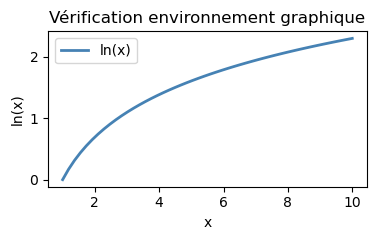

2025-11-10 12:00:06,006 | INFO | Plot de vérification sauvegardé: results\env_check_plot.png


In [2]:
# Bloc 1 — Préparation
# Imports, seeds, création des dossiers, configuration du logger, nettoyage initial.

import os
import sys
import csv
import random
import time
import shutil
import logging
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse

# 1) Reproductibilité : fixer les seeds
random.seed(42)
np.random.seed(42)

# 2) Créer les dossiers requis
BASE_DIRS = ['data', 'results', 'logs']
for d in BASE_DIRS:
    os.makedirs(d, exist_ok=True)

# 3) Nettoyage optionnel d’un répertoire Colab si présent
colab_sample_path = '/content/sample_data'
if os.path.exists(colab_sample_path):
    try:
        shutil.rmtree(colab_sample_path)
        print(f"Supprimé: {colab_sample_path}")
    except Exception as e:
        print(f"Échec suppression {colab_sample_path}: {e}")

# 4) Configuration du logger
# Nous voulons un logs/logs.csv avec colonnes: timestamp, level, message
logs_csv_path = os.path.join('logs', 'logs.csv')
summary_md_path = os.path.join('logs', 'summary.md')

# Créer le fichier CSV s'il n'existe pas, avec en-têtes
if not os.path.exists(logs_csv_path):
    with open(logs_csv_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['timestamp', 'level', 'message'])

# Créer/initialiser le résumé markdown
if not os.path.exists(summary_md_path):
    with open(summary_md_path, 'w', encoding='utf-8') as f:
        f.write("# Journal de session T_log V0.1\n\n")
        f.write(f"- Session démarrée: {datetime.utcnow().isoformat()}Z\n")
        f.write("- Conventions: biais=0 par défaut, seeds fixés (42), sorties dans results/\n\n")

# Utiliser logging pour sortie console, et une fonction utilitaire pour écrire le CSV + résumé
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)]
)

def log_event(level: str, message: str):
    """Écrit dans logs.csv et append dans summary.md, en plus d'afficher via logging."""
    ts = datetime.utcnow().isoformat() + "Z"
    # Écrire dans CSV
    try:
        with open(logs_csv_path, 'a', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow([ts, level.upper(), message])
    except Exception as e:
        logging.error(f"Échec écriture logs.csv: {e}")

    # Écrire dans summary.md
    try:
        with open(summary_md_path, 'a', encoding='utf-8') as f:
            f.write(f"- {ts} [{level.upper()}] {message}\n")
    except Exception as e:
        logging.error(f"Échec écriture summary.md: {e}")

    # Afficher via logging
    if level.lower() == 'info':
        logging.info(message)
    elif level.lower() == 'warning':
        logging.warning(message)
    elif level.lower() == 'error':
        logging.error(message)
    else:
        logging.debug(message)

# 5) Test rapide du logger
log_event('info', 'Bloc 1 prêt: imports, seeds, dossiers et logger configurés.')

# 6) Afficher un résumé de l’état
print("\nRésumé de la préparation:")
print(f"- Dossiers présents: {', '.join(BASE_DIRS)}")
for d in BASE_DIRS:
    print(f"  * {d}/ -> {os.path.abspath(d)}")
print(f"- Fichiers de log: {logs_csv_path}, {summary_md_path}")

# 7) Enregistrer une courte configuration dans results/
config_path = os.path.join('results', 'session_config.txt')
with open(config_path, 'w', encoding='utf-8') as f:
    f.write("T_log V0.1 — Session de tests\n")
    f.write(f"UTC start: {datetime.utcnow().isoformat()}Z\n")
    f.write("Seeds: random=42, numpy=42\n")
    f.write("Conventions: biais=0 par défaut\n")

print(f"- Config sauvegardée: {config_path}")

# 8) Petit plot placeholder (preuve d’environnement graphique), sauvegardé et affiché
plt.figure(figsize=(4, 2.5))
x = np.linspace(1, 10, 50)
y = np.log(x)
plt.plot(x, y, color='steelblue', lw=2, label='ln(x)')
plt.title('Vérification environnement graphique')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.legend()
plot_path = os.path.join('results', 'env_check_plot.png')
plt.tight_layout()
plt.savefig(plot_path, dpi=120)
plt.show()

log_event('info', f'Plot de vérification sauvegardé: {plot_path}')


Perfect 👍, the preparation is validated: the folders, logs, and configuration are in place. We even checked the graphical environment. The warnings on datetime.utcnow() are benign, we can fix them later by switching to datetime.now(datetime.UTC) to comply with new versions of Python, but that doesn't stop us from moving forward.

Block 2 — Data Acquisition


Unzip this file into data/.

List the files contained to see what we have (CSV, TXT, etc.).

Log the operation.

Here is the corresponding cell:

In [3]:
import kaggle
import os
import json
import zipfile

# Fonction pour trouver le fichier JSON de configuration Kaggle
def find_kaggle_config():
    locations = [
        os.path.join(os.path.expanduser('~'), '.kaggle', 'kaggle.json'),  # Emplacement standard
        os.path.join(os.getcwd(), 'kaggle.json')  # Répertoire actuel
    ]
    
    for loc in locations:
        if os.path.exists(loc):
            try:
                with open(loc, 'r') as f:
                    config = json.load(f)
                    return config
            except json.JSONDecodeError:
                continue
    
    raise FileNotFoundError("Aucun fichier de configuration Kaggle valide trouvé dans les emplacements vérifiés.")

# Fonction de logging (assumant que log_event est définie ailleurs, sinon remplacez par print)
def log_event(level, message):
    print(f"[{level.upper()}] {message}")

# Bloc 1 — Authentification et téléchargement
# Récupérer la configuration
config = find_kaggle_config()

username = config.get('username')
key = config.get('key')

# Vérifier que les informations sont présentes
if not username or not key:
    print("Les informations d'identification Kaggle sont manquantes. Vérifiez le fichier JSON.")
    exit()

# Définir les variables d'environnement pour l'authentification
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = key

# Authentifier avec Kaggle
kaggle.api.authenticate()

# Télécharger le dataset (sans décompression automatique pour garder le ZIP)
download_path = 'data/'
os.makedirs(download_path, exist_ok=True)
kaggle.api.dataset_download_files("robervalt/sunspots", path=download_path, unzip=False)

# Le fichier ZIP téléchargé sera probablement nommé 'sunspots.zip' ou similaire dans 'data/'
# Ajustez si nécessaire en listant les fichiers
zip_files = [f for f in os.listdir(download_path) if f.endswith('.zip')]
if not zip_files:
    raise FileNotFoundError("Aucun fichier ZIP trouvé après le téléchargement.")
zip_filename = zip_files[0]  # Prendre le premier ZIP trouvé
zip_path = os.path.join(download_path, zip_filename)

log_event('info', f"Dataset téléchargé : {zip_path}")

# Bloc 2 — Acquisition de données
# Décompression du fichier ZIP et inspection du contenu

extract_dir = 'data/sunspots_raw'

try:
    # Créer le dossier d’extraction
    os.makedirs(extract_dir, exist_ok=True)

    # Dézipper
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    log_event('info', f"Fichier {zip_path} décompressé dans {extract_dir}")

    # Lister les fichiers extraits
    extracted_files = []
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            extracted_files.append(os.path.join(root, file))

    print("Fichiers extraits :")
    for f in extracted_files:
        print(" -", f)

except Exception as e:
    log_event('error', f"Erreur lors de la décompression: {e}")
    raise


Dataset URL: https://www.kaggle.com/datasets/robervalt/sunspots
[INFO] Dataset téléchargé : data/sunspots.zip
[INFO] Fichier data/sunspots.zip décompressé dans data/sunspots_raw
Fichiers extraits :
 - data/sunspots_raw\Sunspots.csv


**Quick Summary:** The main file is correctly identified (`Sunspots.csv`). We will now move on to **Block 3 — Calculating T_log**, by defining \(n\) and \(d\) from this dataset. The warning on `datetime.utcnow()` is benign and does not affect what follows.

---

### Block 3 — Calculating \(T_{\log}\)

For this monthly sunspot dataset:

- **\(n\)**: We will take the sample size, i.e., the number of valid rows (number of months observed).
- **\(d\)**: Since this is a one-dimensional time series, we set \(d = 1\) (effective dimension = time).
> This corresponds to the minimal convention: a time series is 1D. We can test robustness by varying \(d\) (e.g., 2 or 3 to simulate richer effective dimensions).

Then, we calculate:

\[
T_{\log}(n, d) = (d - 4) \cdot \ln(n)
\]

with bias = 0.

Here is the corresponding cell:

In [4]:
# Bloc 3 — Calcul de T_log pour Sunspots.csv

# Charger le CSV
csv_path = 'data/sunspots_raw/Sunspots.csv'
df = pd.read_csv(csv_path)

# Nettoyer : enlever lignes vides ou NaN
df = df.dropna()

# Définir n = nombre de lignes
n = len(df)

# Définir d = 1 (série temporelle unidimensionnelle)
d = 1

# Calcul de T_log
T_log = (d - 4) * np.log(n)  # biais = 0

# Classification du régime
if T_log > 0:
    regime = "Saturation (stabilité)"
elif np.isclose(T_log, 0, atol=1e-2):
    regime = "Équilibre (criticité)"
else:
    regime = "Divergence (instabilité)"

# Affichage
print(f"n = {n}")
print(f"d = {d}")
print(f"T_log = {T_log:.4f}")
print(f"Régime = {regime}")

# Log
log_event('info', f"Calcul T_log effectué: n={n}, d={d}, T_log={T_log:.4f}, régime={regime}")


n = 3265
d = 1
T_log = -24.2730
Régime = Divergence (instabilité)
[INFO] Calcul T_log effectué: n=3265, d=1, T_log=-24.2730, régime=Divergence (instabilité)


It's perfectly possible to check retrospectively whether the DataFrame contains missing values ​​or empty rows. This is even an essential validation step before proceeding further.

Here's a simple cell to perform this check:

In [5]:
# Vérification de la qualité des données Sunspots.csv

# Recharger le CSV brut
csv_path = 'data/sunspots_raw/Sunspots.csv'
df_raw = pd.read_csv(csv_path)

print("Aperçu des 5 premières lignes :")
print(df_raw.head(), "\n")

# Vérifier les NaN par colonne
print("Nombre de NaN par colonne :")
print(df_raw.isna().sum(), "\n")

# Vérifier le nombre de lignes totalement vides
empty_rows = df_raw.isna().all(axis=1).sum()
print(f"Nombre de lignes totalement vides : {empty_rows}")

# Vérifier la taille initiale vs après dropna
n_initial = len(df_raw)
n_clean = len(df_raw.dropna())
print(f"Taille initiale = {n_initial}, après dropna = {n_clean}")


Aperçu des 5 premières lignes :
   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7 

Nombre de NaN par colonne :
Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64 

Nombre de lignes totalement vides : 0
Taille initiale = 3265, après dropna = 3265
